In [1]:
import pandas as pd

data = pd.read_csv("beauty.csv")

In [2]:
data

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [3]:

import statsmodels.api as sm

X = data['btystdave']
Y = data['courseevaluation']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        13:08:01   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

C:\Users\shire\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
# Variables taken from model above
const = 4.0100
btystdave = 0.1330

# We know btystdave and want to predict courseevaluation
btystdave = data['btystdave']

for row in data:
    predicted_courseevaluation = (const) + (btystdave)*btystdave

# Predicted data
print(predicted_courseevaluation)

0      4.050629
1      4.692410
2      4.446039
3      4.597235
4      6.030506
         ...   
458    5.316552
459    5.316552
460    4.120258
461    4.120258
462    4.120258
Name: btystdave, Length: 463, dtype: float64


In [5]:
data['courseevaluation']

0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: courseevaluation, Length: 463, dtype: float64

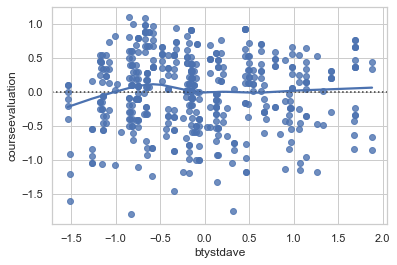

In [6]:
#Residua
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Without this line plot appers in figure
%matplotlib inline

sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True)
plt.show()

In [7]:
import statsmodels.api as sm

X = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           0.000355
Time:                        13:08:02   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0133      0.026    154.810      0.0

C:\Users\shire\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:

const = 4.0133
btystdave= -1.624e+04
btystdf2u = 2707.3179
btystdfl = 2707.2809
btystdfu = 2707.3710
btystdm2u = 2707.3325
btystdml = 2707.2221
btystdmu = 2707.3722

btystdave = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]

for row in data:
    predicted_courseevaluation = (const) + (btystdave)*btystdave + (btystdf2u)*btystdave + (btystdfl)*btystdave +(btystdfu)*btystdave + (btystdm2u)*btystdave + (btystdml)*btystdave + (btystdmu)*btystdave

predicted_courseevaluation

,btystdave,btystdf2u,btystdfl,btystdfu,btystdm2u,btystdml,btystdmu
0,3278.280938,4704.299369,7443.956947,14231.410782,11078.190880,-14615.737752,-3170.299922
1,-13414.083510,-26298.015809,-1190.013282,-9368.487687,-18381.237030,-14615.737752,-10629.636412
2,-10721.926761,-3046.959676,7443.956947,-25099.401088,-18381.237030,-14615.737752,-10629.636412
3,-12443.300478,-10797.764951,-18456.257111,-1502.323364,-28199.588250,-5072.473829,-10629.636412
4,23095.839408,27960.820251,24713.602161,29967.024345,11078.190880,33107.492481,11749.636802
...,...,...,...,...,...,...,...
458,18572.824641,27960.820251,16078.493804,6364.308376,1257.650098,33107.492481,26671.259057
459,18572.824641,27960.820251,16078.493804,6364.308376,1257.650098,33107.492481,26671.259057
460,5397.920794,12456.015435,-9823.420134,22098.975732,-8562.158122,4471.482130,11749.636802
461,5397.920794,12456.015435,-9823.420134,22098.975732,-8562.158122,4471.482130,11749.636802


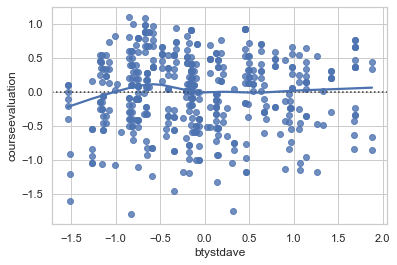

In [9]:
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True)
plt.show()

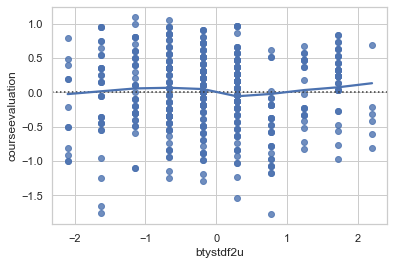

In [10]:
sns.residplot(data['btystdf2u'], data['courseevaluation'], lowess=True)
plt.show()

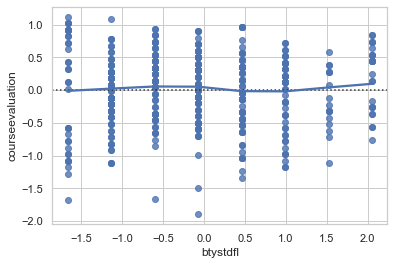

In [11]:
sns.residplot(data['btystdfl'], data['courseevaluation'], lowess=True)
plt.show()

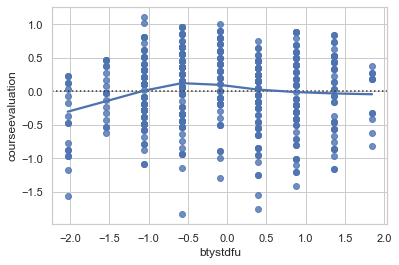

In [12]:
sns.residplot(data['btystdfu'], data['courseevaluation'], lowess=True)
plt.show()

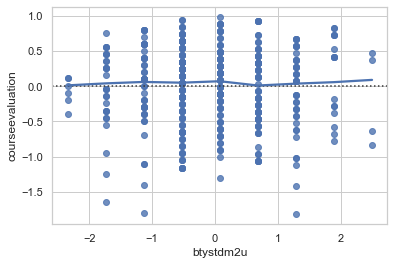

In [13]:
sns.residplot(data['btystdm2u'], data['courseevaluation'], lowess=True)
plt.show()

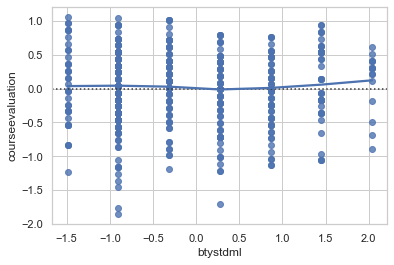

In [14]:
sns.residplot(data['btystdml'], data['courseevaluation'], lowess=True)
plt.show()

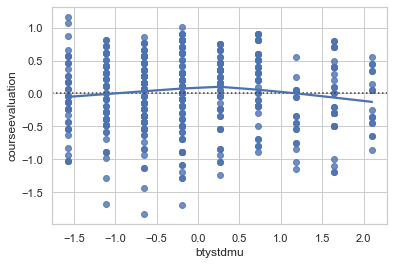

In [15]:
sns.residplot(data['btystdmu'], data['courseevaluation'], lowess=True)
plt.show()